In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
df_airline = pd.read_csv('airline_passengers.csv')

In [5]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [9]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [8]:
df_airline.dropna(inplace= True)

In [12]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [16]:
df_airline.set_index('Month', inplace=True)

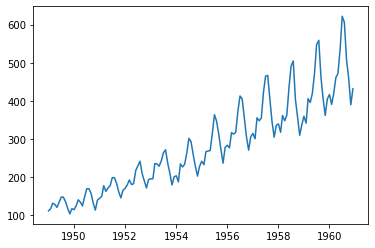

In [18]:
plt.plot(df_airline)

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(df_airline)

In [22]:
result

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [51]:
df_airline['Differencing'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [52]:
df_airline.head()

,Thousands of Passengers,Differencing,Differencing1,Differencing12
Month,,,,
1951-03-01,178.0,NaN,23.0,19.0
1951-04-01,163.0,NaN,-43.0,-22.0
1951-05-01,172.0,NaN,24.0,28.0
1951-06-01,178.0,NaN,-3.0,-37.0
1951-07-01,199.0,NaN,15.0,18.0


In [53]:
df_airline.dropna(inplace=True)

In [54]:
df_airline.head()

,Thousands of Passengers,Differencing,Differencing1,Differencing12
Month,,,,
1952-03-01,193.0,15.0,4.0,-19.0
1952-04-01,181.0,18.0,-25.0,18.0
1952-05-01,183.0,11.0,14.0,-10.0
1952-06-01,218.0,40.0,33.0,36.0
1952-07-01,230.0,31.0,-23.0,-38.0


In [55]:
result = adfuller(df_airline['Differencing'])

In [56]:
result

(-3.0591176294883504,
 0.0297303575537637,
 1,
 104,
 {'1%': -3.4948504603223145,
  '5%': -2.889758398668639,
  '10%': -2.5818220155325444},
 724.0210339042253)

In [41]:
#it should be less that 0.05 so we are differencing it again
df_airline['Differencing1'] = df_airline['Differencing'] - df_airline['Differencing'].shift(1)

In [42]:
df_airline.dropna(inplace=True)

In [43]:
df_airline.head()

,Thousands of Passengers,Differencing,Differencing1
Month,,,
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0
1949-06-01,135.0,14.0,22.0
1949-07-01,148.0,13.0,-1.0


In [44]:
result = adfuller(df_airline['Differencing1'])
result

(-16.384231542468505,
 2.7328918500142407e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.60204172756)

In [48]:
#seasonal diff
df_airline['Differencing12'] = df_airline['Differencing1'] - df_airline['Differencing1'].shift(12)

In [49]:
df_airline.dropna(inplace=True)

In [50]:
result = adfuller(df_airline['Differencing12'])
result

(-7.670713024903471,
 1.59643206119562e-11,
 7,
 110,
 {'1%': -3.4912451337340342,
  '5%': -2.8881954545454547,
  '10%': -2.5809876033057852},
 841.9810310055661)

In [57]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

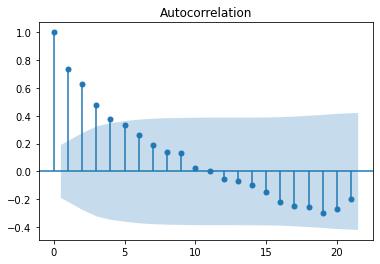

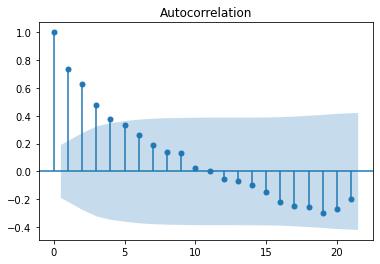

In [60]:
plot_acf(df_airline['Differencing'])
plot_pacf(df_airline['Differencing'])

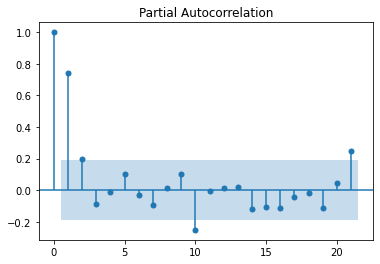

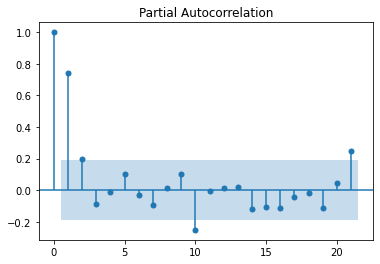

In [61]:
plot_pacf(df_airline['Differencing'])

In [62]:
df_airline

,Thousands of Passengers,Differencing,Differencing1,Differencing12
Month,,,,
1952-03-01,193.0,15.0,4.0,-19.0
1952-04-01,181.0,18.0,-25.0,18.0
1952-05-01,183.0,11.0,14.0,-10.0
1952-06-01,218.0,40.0,33.0,36.0
1952-07-01,230.0,31.0,-23.0,-38.0
...,...,...,...,...
1960-08-01,606.0,47.0,-103.0,-38.0
1960-09-01,508.0,45.0,-82.0,25.0
1960-10-01,461.0,54.0,51.0,11.0


In [101]:
#train test split
from datetime import datetime,timedelta
train_time_end = datetime(1995,12,1)
test_time_end = datetime(1960,12,1)
test_time_start = datetime(1956,1,1)

In [102]:
train_data = df_airline[:train_time_end]
test_data = df_airline[test_time_start:test_time_end]

In [103]:
train_data

,Thousands of Passengers,Differencing,Differencing1,Differencing12
Month,,,,
1952-03-01,193.0,15.0,4.0,-19.0
1952-04-01,181.0,18.0,-25.0,18.0
1952-05-01,183.0,11.0,14.0,-10.0
1952-06-01,218.0,40.0,33.0,36.0
1952-07-01,230.0,31.0,-23.0,-38.0
...,...,...,...,...
1960-08-01,606.0,47.0,-103.0,-38.0
1960-09-01,508.0,45.0,-82.0,25.0
1960-10-01,461.0,54.0,51.0,11.0


In [104]:
test_data

,Thousands of Passengers,Differencing,Differencing1,Differencing12
Month,,,,
1956-01-01,284.0,42.0,-35.0,-22.0
1956-02-01,277.0,44.0,-13.0,9.0
1956-03-01,317.0,50.0,47.0,4.0
1956-04-01,313.0,44.0,-44.0,-12.0
1956-05-01,318.0,48.0,9.0,10.0
1956-06-01,374.0,59.0,51.0,7.0
1956-07-01,413.0,49.0,-17.0,-21.0
1956-08-01,405.0,58.0,-47.0,19.0
1956-09-01,355.0,43.0,-42.0,-24.0


In [105]:
from statsmodels.tsa.arima_model import ARIMA

In [147]:
model = ARIMA(df_airline['Thousands of Passengers'],(3,1,5))

E:\python\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('N

In [148]:
fit_model = model.fit()

E:\python\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [149]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                 
=====================================================================================
Dep. Variable:     D.Thousands of Passengers   No. Observations:                  105
Model:                        ARIMA(3, 1, 5)   Log Likelihood                -497.221
Method:                              css-mle   S.D. of innovations             26.186
Date:                       Wed, 23 Mar 2022   AIC                           1014.441
Time:                               22:56:35   BIC                           1040.981
Sample:                           04-01-1952   HQIC                          1025.196
                                - 12-01-1960                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               2.9422      0.229     12.870      0.000       2.494       3.390
ar.L1.D.Thousands of Passengers     0.3381      0.341      0.991      0.322      -0.330       1.007
ar.L2.D.Thousands of Passengers    -0.2145      0.309     -0.695      0.487      -0.819       0.390
ar.L3.D.Thousands of Passengers    -0.4692      0.262     -1.790      0.073      -0.983       0.044
ma.L1.D.Thousands of Passengers    -0.2870      0.347     -0.828      0.408      -0.966       0.392
ma.L2.D.Thousands of Passengers    -0.1578      0.277     -0.569      0.569      -0.701       0.386
ma.L3.D.Thousands of Passengers     0.5333      0.119      4.480      0.000       0.300       0.767
ma.L4.D.Thousands of Passengers    -0.6822      0.147     -4.625      0.000      -0.971      -0.393
ma.L5.D.Thousands of Passengers    -0.4062      0.292     -1.389      0.165      -0.979       0.167
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6025           -0.9588j            1.1323           -0.1607
AR.2            0.6025           +0.9588j            1.1323            0.1607
AR.3           -1.6621           -0.0000j            1.6621           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            0.3163           -0.9487j            1.0000           -0.1988
MA.3            0.3163           +0.9487j            1.0000            0.1988
MA.4           -1.1262           -0.0000j            1.1262           -0.5000
MA.5           -2.1856           -0.0000j            2.1856           -0.5000
-----------------------------------------------------------------------------
"""

In [150]:
#predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [151]:
predictions = fit_model.predict(pred_start_date,pred_end_date)

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [152]:
test_data['Predictions'] = predictions

C:\Users\Asheesh\AppData\Local\Temp/ipykernel_1332/330256658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


<AxesSubplot:xlabel='Month'>

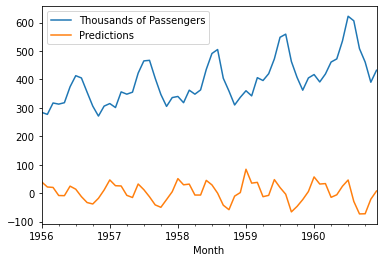

In [153]:
test_data[['Thousands of Passengers','Predictions']].plot()

In [135]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [136]:
sa_model = SARIMAX(df_airline['Thousands of Passengers'], order = (3,0,5) , seasonal_order=(0,1,0,12))

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [138]:
fit_model1 =sa_model.fit()

E:\python\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [139]:
fit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                  106
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -367.502
Date:                             Wed, 23 Mar 2022   AIC                            753.004
Time:                                     22:52:02   BIC                            775.894
Sample:                                 03-01-1952   HQIC                           762.250
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6004      2.081      0.289      0.773      -3.478       4.679
ar.L2          0.5811      0.521      1.116      0.265      -0.440       1.602
ar.L3         -0.2066      1.557     -0.133      0.894      -3.258       2.845
ma.L1          0.1162      2.049      0.057      0.955      -3.900       4.133
ma.L2         -0.1969      1.043     -0.189      0.850      -2.242       1.848
ma.L3          0.0380      0.207      0.184      0.854      -0.367       0.443
ma.L4         -0.3387      0.161     -2.099      0.036      -0.655      -0.023
ma.L5          0.1645      0.731      0.225      0.822      -1.268       1.597
sigma2       140.8645     21.230      6.635      0.000      99.255     182.474
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.32
Prob(Q):                              0.97   Prob(JB):                         0.03
Heteroskedasticity (H):               2.28   Skew:                             0.09
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
predictions1 = fit_model1.predict(pred_start_date,pred_end_date)

E:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [142]:
test_data['Predictions1'] = predictions1

C:\Users\Asheesh\AppData\Local\Temp/ipykernel_1332/3490255020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions1'] = predictions1


<AxesSubplot:xlabel='Month'>

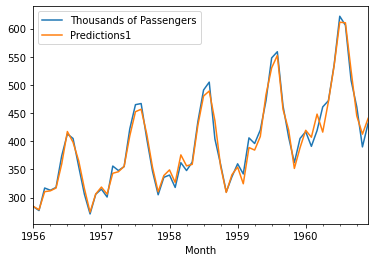

In [143]:
test_data[['Thousands of Passengers','Predictions1']].plot()

In [145]:
test_data['Predictions1']

Month
1956-01-01    284.421598
1956-02-01    278.328536
1956-03-01    310.477627
1956-04-01    311.984719
1956-05-01    316.993470
1956-06-01    359.597354
1956-07-01    417.303010
1956-08-01    398.237090
1956-09-01    365.096243
1956-10-01    316.043381
1956-11-01    274.113917
1956-12-01    306.364127
1957-01-01    318.676277
1957-02-01    306.127644
1957-03-01    343.158373
1957-04-01    345.924073
1957-05-01    355.427475
1957-06-01    409.655233
1957-07-01    452.493206
1957-08-01    456.884773
1957-09-01    412.192625
1957-10-01    353.991714
1957-11-01    310.261096
1957-12-01    339.202511
1958-01-01    349.134772
1958-02-01    326.810672
1958-03-01    375.822356
1958-04-01    356.318997
1958-05-01    358.961140
1958-06-01    428.626343
1958-07-01    480.315573
1958-08-01    489.196063
1958-09-01    436.477275
1958-10-01    355.741440
1958-11-01    309.154273
1958-12-01    340.603244
1959-01-01    354.163219
1959-02-01    324.531566
1959-03-01    388.818009
1959-04-01    384.3

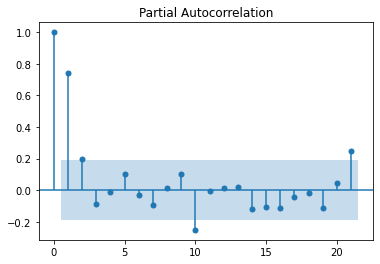

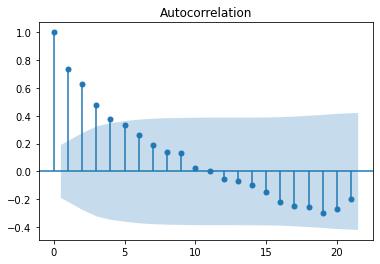

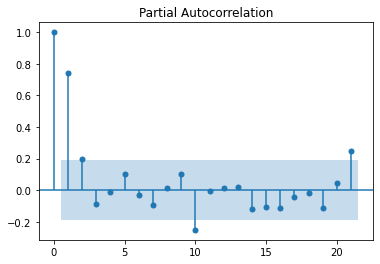

In [146]:
plot_acf(df_airline['Differencing'])
plot_pacf(df_airline['Differencing'])